In [1]:
#import the required libraries here
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import norm
from matplotlib.ticker import FuncFormatter

import pyfolio as pf

%matplotlib inline

C:\Users\summe\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
tickers = ['FSLY','IMMR', 'FB', 'U','NVDA','AAPL', 'MSFT',"METV"]

start_date = '2021-07-01'
end_date = '2022-03-01'

panel_data = data.DataReader(tickers,'yahoo', start_date, end_date)
panel_data = panel_data.loc['2021-01-01' : '2021-12-31']
data = panel_data[['Close', 'Adj Close']]
data

Attributes      Close                                                        \
Symbols          FSLY  IMMR          FB           U        NVDA        AAPL   
Date                                                                          
2021-06-30  59.599998  8.77  347.709991  109.830002  200.024994  136.960007   
2021-07-01  58.020000  8.49  354.390015  105.839996  202.119995  137.270004   
2021-07-02  56.470001  8.46  354.700012  106.089996  204.869995  139.960007   
2021-07-06  56.860001  8.22  352.779999  106.650002  206.985001  142.020004   
2021-07-07  54.369999  8.23  350.489990  104.489998  203.717499  144.570007   
...               ...   ...         ...         ...         ...         ...   
2021-12-27  37.750000  6.05  346.179993  148.009995  309.450012  180.330002   
2021-12-28  36.259998  5.87  346.220001  143.520004  303.220001  179.289993   
2021-12-29  35.090000  5.80  342.940002  144.550003  300.010010  179.380005   
2021-12-30  37.230000  5.85  344.359985  145.919998  295.859985  178.199997   
2021-12-31  35.450001  5.71  336.350006  142.990005  294.109985  177.570007   

Attributes                     Adj Close                                \
Symbols           MSFT   METV       FSLY  IMMR          FB           U   
Date                                                                     
2021-06-30  270.899994  15.12  59.599998  8.77  347.709991  109.830002   
2021-07-01  271.600006  14.89  58.020000  8.49  354.390015  105.839996   
2021-07-02  277.649994  15.00  56.470001  8.46  354.700012  106.089996   
2021-07-06  277.660004  15.01  56.860001  8.22  352.779999  106.650002   
2021-07-07  279.929993  14.89  54.369999  8.23  350.489990  104.489998   
...                ...    ...        ...   ...         ...         ...   
2021-12-27  342.450012  15.60  37.750000  6.05  346.179993  148.009995   
2021-12-28  341.250000  15.37  36.259998  5.87  346.220001  143.520004   
2021-12-29  341.950012  15.25  35.090000  5.80  342.940002  144.550003   
2021-12-30  339.320007  15.31  37.230000  5.85  344.359985  145.919998   
2021-12-31  336.320007  15.18  35.450001  5.71  336.350006  142.990005   

Attributes                                             
Symbols           NVDA        AAPL        MSFT   METV  
Date                                                   
2021-06-30  199.931168  136.382065  269.331696  15.12  
2021-07-01  202.025208  136.690735  270.027649  14.89  
2021-07-02  204.773911  139.369400  276.042633  15.00  
2021-07-06  206.887924  141.420700  276.052582  15.01  
2021-07-07  203.621964  143.959946  278.309418  14.89  
...                ...         ...         ...    ...  
2021-12-27  309.397308  180.100540  341.743378  15.60  
2021-12-28  303.168335  179.061859  340.545837  15.37  
2021-12-29  299.958893  179.151749  341.244415  15.25  
2021-12-30  295.809601  177.973251  338.619843  15.31  
2021-12-31  294.059875  177.344055  335.626038  15.18  

[129 rows x 16 columns]

In [3]:
data.tail()

Attributes      Close                                                        \
Symbols          FSLY  IMMR          FB           U        NVDA        AAPL   
Date                                                                          
2021-12-27  37.750000  6.05  346.179993  148.009995  309.450012  180.330002   
2021-12-28  36.259998  5.87  346.220001  143.520004  303.220001  179.289993   
2021-12-29  35.090000  5.80  342.940002  144.550003  300.010010  179.380005   
2021-12-30  37.230000  5.85  344.359985  145.919998  295.859985  178.199997   
2021-12-31  35.450001  5.71  336.350006  142.990005  294.109985  177.570007   

Attributes                     Adj Close                                \
Symbols           MSFT   METV       FSLY  IMMR          FB           U   
Date                                                                     
2021-12-27  342.450012  15.60  37.750000  6.05  346.179993  148.009995   
2021-12-28  341.250000  15.37  36.259998  5.87  346.220001  143.520004   
2021-12-29  341.950012  15.25  35.090000  5.80  342.940002  144.550003   
2021-12-30  339.320007  15.31  37.230000  5.85  344.359985  145.919998   
2021-12-31  336.320007  15.18  35.450001  5.71  336.350006  142.990005   

Attributes                                             
Symbols           NVDA        AAPL        MSFT   METV  
Date                                                   
2021-12-27  309.397308  180.100540  341.743378  15.60  
2021-12-28  303.168335  179.061859  340.545837  15.37  
2021-12-29  299.958893  179.151749  341.244415  15.25  
2021-12-30  295.809601  177.973251  338.619843  15.31  
2021-12-31  294.059875  177.344055  335.626038  15.18

In [4]:
close_data = panel_data['Close']
adj_close_data = panel_data['Adj Close']

In [5]:
## Check for null values 
close_data.isnull().sum()
adj_close_data.isnull().sum()

Symbols
FSLY    0
IMMR    0
FB      0
U       0
NVDA    0
AAPL    0
MSFT    0
METV    0
dtype: int64

In [6]:
close_data.count()

Symbols
FSLY    129
IMMR    129
FB      129
U       129
NVDA    129
AAPL    129
MSFT    129
METV    129
dtype: int64

In [7]:
### Calculate the adj close returned series
return_series_adj = (adj_close_data.pct_change()+ 1).cumprod() - 1
return_series_adj.tail(1)*100

Symbols,FSLY,IMMR,FB,U,NVDA,AAPL,MSFT,METV
Date,,,,,,,,
2021-12-31,-40.520131,-34.891679,-3.267086,30.192118,47.080557,30.034734,24.614386,0.396828


<AxesSubplot:xlabel='Date'>

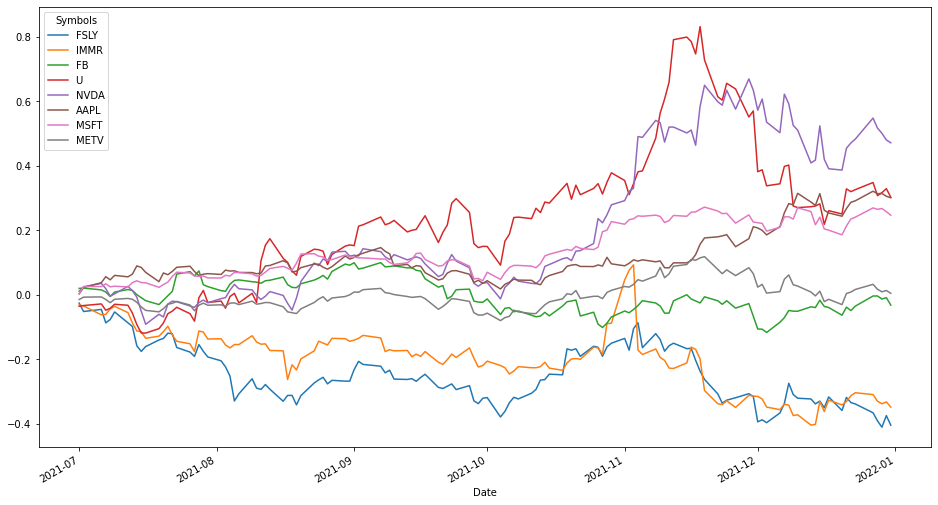

In [8]:
return_series_adj.plot(figsize=(16,9))

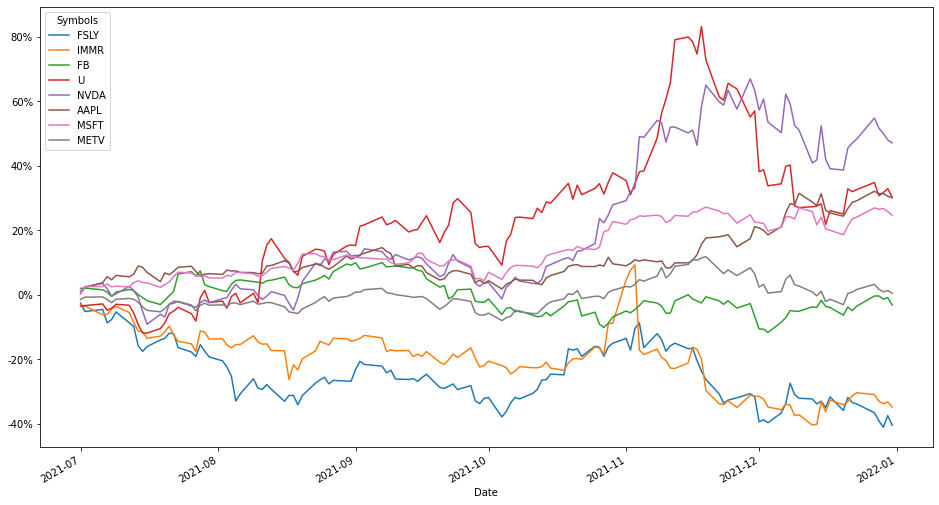

In [9]:
ax1 = return_series_adj.plot(figsize=(16,9))
#This sets the axis to percentage scale
ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

In [10]:
### Check for annualised return 
annualized_return = (1+return_series_adj.tail(1))**(1/(1/2))-1
annualized_return

Symbols,FSLY,IMMR,FB,U,NVDA,AAPL,MSFT,METV
Date,,,,,,,,
2021-12-31,-0.646215,-0.576091,-0.064274,0.694999,1.163269,0.690903,0.552875,0.007952


<AxesSubplot:xlabel='Date'>

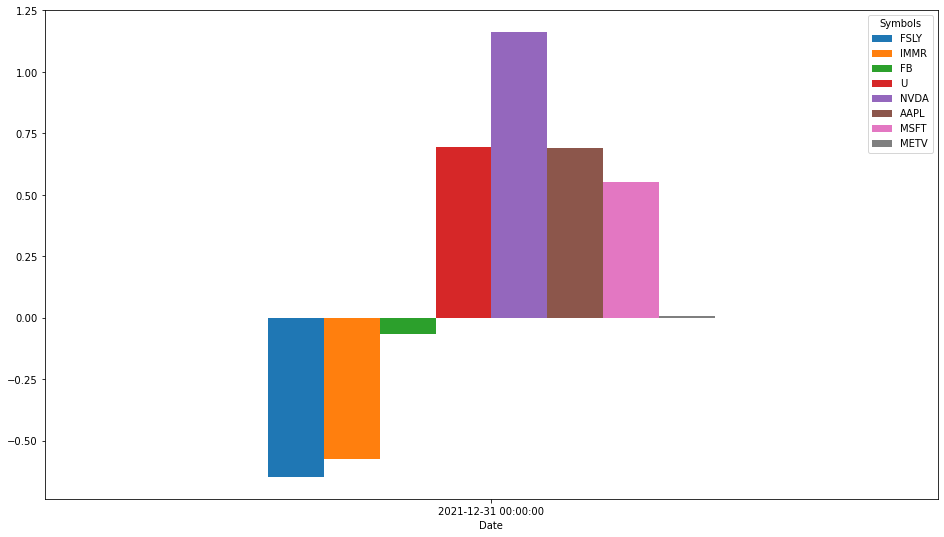

In [11]:
annualized_return.plot.bar(rot=0, figsize=(16,9))

C:\Users\summe\AppData\Local\Temp/ipykernel_23344/863718015.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


[Text(0, -0.75, '-75.00%'),
 Text(0, -0.5, '-50.00%'),
 Text(0, -0.25, '-25.00%'),
 Text(0, 0.0, '0.00%'),
 Text(0, 0.25, '25.00%'),
 Text(0, 0.5, '50.00%'),
 Text(0, 0.75, '75.00%'),
 Text(0, 1.0, '100.00%'),
 Text(0, 1.25, '125.00%'),
 Text(0, 1.5, '150.00%')]

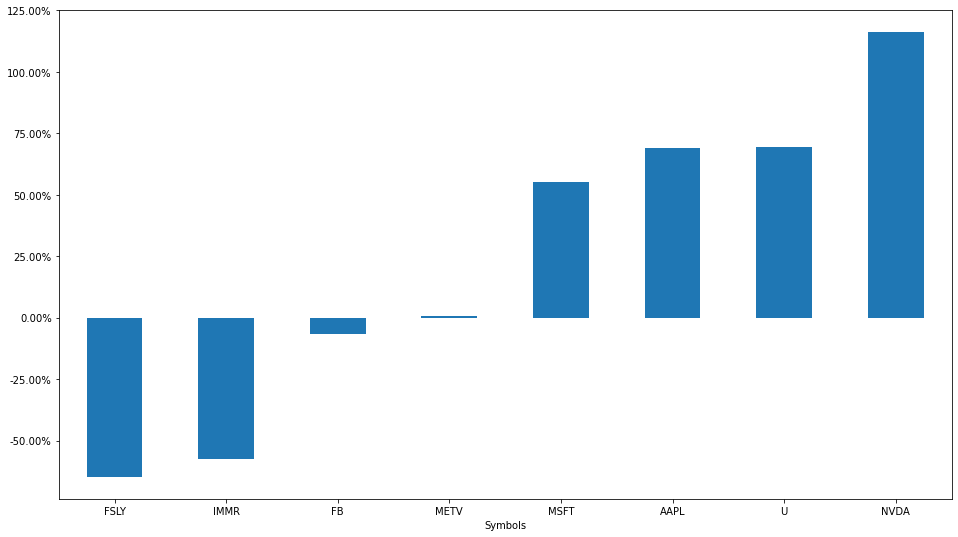

In [12]:
annualized_return = annualized_return.squeeze()
# annualized_return.sort_values(ascending=True).plot.bar(rot=0, figsize=(16,9))

ax = annualized_return.sort_values(ascending=True).plot.bar(rot=0, figsize=(16,9))
type(ax)  # matplotlib.axes._subplots.AxesSubplot

# manipulate
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

In [13]:
### Find Corr between these stocks
return_series_close = (close_data.pct_change()+ 1).cumprod() - 1
# return_series_close.plot(figsize=(16,9))
return_series_close.corr()

Symbols,FSLY,IMMR,FB,U,NVDA,AAPL,MSFT,METV
Symbols,,,,,,,,
FSLY,1.000000,0.758933,0.149105,-0.197366,-0.298011,-0.504765,-0.298211,0.109466
IMMR,0.758933,1.000000,0.373492,-0.442718,-0.605199,-0.706019,-0.552908,-0.222922
FB,0.149105,0.373492,1.000000,-0.422991,-0.486578,-0.259623,-0.459541,-0.182229
U,-0.197366,-0.442718,-0.422991,1.000000,0.823507,0.388195,0.838717,0.822390
NVDA,-0.298011,-0.605199,-0.486578,0.823507,1.000000,0.751314,0.945436,0.830791
AAPL,-0.504765,-0.706019,-0.259623,0.388195,0.751314,1.000000,0.742984,0.456147
MSFT,-0.298211,-0.552908,-0.459541,0.838717,0.945436,0.742984,1.000000,0.790530
METV,0.109466,-0.222922,-0.182229,0.822390,0.830791,0.456147,0.790530,1.000000


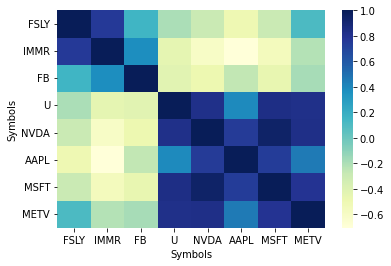

In [14]:
import seaborn as sns
dataplot = sns.heatmap(return_series_close.corr(), cmap="YlGnBu")

In [15]:
### Volatility
ahv = np.sqrt(np.log(close_data / close_data.shift(1)).var()) * np.sqrt(252)
ahv

Symbols
FSLY    0.603225
IMMR    0.670091
FB      0.285605
U       0.557605
NVDA    0.460791
AAPL    0.223441
MSFT    0.198213
METV    0.225692
dtype: float64

C:\Users\summe\AppData\Local\Temp/ipykernel_23344/3817654803.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


[Text(0, 0.0, '0.00%'),
 Text(0, 0.1, '10.00%'),
 Text(0, 0.2, '20.00%'),
 Text(0, 0.30000000000000004, '30.00%'),
 Text(0, 0.4, '40.00%'),
 Text(0, 0.5, '50.00%'),
 Text(0, 0.6000000000000001, '60.00%'),
 Text(0, 0.7000000000000001, '70.00%'),
 Text(0, 0.8, '80.00%')]

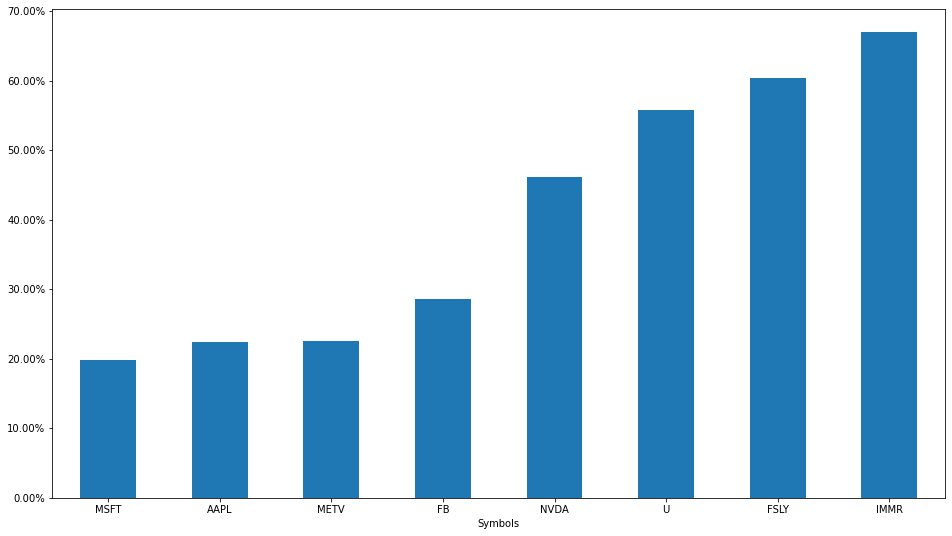

In [16]:
# ahv.sort_values(ascending=True).plot.bar(rot=0, figsize=(16,9))

ax = ahv.sort_values(ascending=True).plot.bar(rot=0, figsize=(16,9))


# manipulate
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

In [17]:
risk_free_ann_ret_rate = 0.01

returns_ts = adj_close_data.pct_change().dropna()
avg_daily_ret = returns_ts.mean()

returns_ts['RiskFree_Rate'] = risk_free_ann_ret_rate/252
avg_rf_ret = returns_ts['RiskFree_Rate'].mean()

#Add the excess return columns for each ETF
returns_ts['Excess_ret_FSLY'] = returns_ts["FSLY"] - returns_ts['RiskFree_Rate']
returns_ts['Excess_ret_IMMR'] = returns_ts["IMMR"] - returns_ts['RiskFree_Rate']
returns_ts['Excess_ret_FB'] = returns_ts["FB"] - returns_ts['RiskFree_Rate']
returns_ts['Excess_ret_U'] = returns_ts["U"] - returns_ts['RiskFree_Rate']
returns_ts['Excess_ret_NVDA'] = returns_ts["NVDA"] - returns_ts['RiskFree_Rate']
returns_ts['Excess_ret_AAPL'] = returns_ts["AAPL"] - returns_ts['RiskFree_Rate']
returns_ts['Excess_ret_MSFT'] = returns_ts["MSFT"] - returns_ts['RiskFree_Rate']
returns_ts['Excess_ret_METV'] = returns_ts["METV"] - returns_ts['RiskFree_Rate']

In [18]:
#calculate sharpe ratio

sharpe_FSLY = ((avg_daily_ret['FSLY'] - avg_rf_ret) /returns_ts['Excess_ret_FSLY'].std())*np.sqrt(252)
print("Sharpe Ratio FSLY :\n", sharpe_FSLY.round(2))
sharpe_IMMR = ((avg_daily_ret['IMMR'] - avg_rf_ret) /returns_ts['Excess_ret_IMMR'].std())*np.sqrt(252)
print("Sharpe Ratio IMMR :\n" , sharpe_IMMR.round(2))
sharpe_FB = ((avg_daily_ret['FB'] - avg_rf_ret) /returns_ts['Excess_ret_FB'].std())*np.sqrt(252)
print("Sharpe Ratio FB :\n" , sharpe_FB.round(2))
sharpe_U = ((avg_daily_ret['U'] - avg_rf_ret) /returns_ts['Excess_ret_U'].std())*np.sqrt(252)
print("Sharpe Ratio U :\n", sharpe_U.round(2))
sharpe_NVDA = ((avg_daily_ret['NVDA'] - avg_rf_ret) /returns_ts['Excess_ret_NVDA'].std())*np.sqrt(252)
print("Sharpe Ratio NVDA :\n" , sharpe_NVDA.round(2))
sharpe_AAPL = ((avg_daily_ret['AAPL'] - avg_rf_ret) /returns_ts['Excess_ret_AAPL'].std())*np.sqrt(252)
print("Sharpe Ratio AAPL :\n" , sharpe_AAPL.round(2))
sharpe_MSFT = ((avg_daily_ret['MSFT'] - avg_rf_ret) /returns_ts['Excess_ret_MSFT'].std())*np.sqrt(252)
print("Sharpe Ratio MSFT :\n" , sharpe_MSFT.round(2))

sharpe_METV = ((avg_daily_ret['METV'] - avg_rf_ret) /returns_ts['Excess_ret_METV'].std())*np.sqrt(252)
print("Sharpe Ratio METV :\n" , sharpe_METV.round(2))

Sharpe Ratio FSLY :
 -1.42
Sharpe Ratio IMMR :
 -0.98
Sharpe Ratio FB :
 -0.12
Sharpe Ratio U :
 1.19
Sharpe Ratio NVDA :
 1.84
Sharpe Ratio AAPL :
 2.38
Sharpe Ratio MSFT :
 2.23
Sharpe Ratio METV :
 0.1


In [19]:
flattened_data = pd.read_csv('flattened_data.csv')

In [20]:
#Install panda profiling 
'''
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension
'''

'\nimport sys\n!{sys.executable} -m pip install -U pandas-profiling[notebook]\n!jupyter nbextension enable --py widgetsnbextension\n'

In [21]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(flattened_data)
# prof.to_file(output_file='output.html')

In [22]:
# #Write to csv 
# adj_close_data.to_csv("Adj_close.csv", sep=',', encoding='utf-8')

In [23]:
# adj_close_prof = ProfileReport(adj_close_data)
# adj_close_prof.to_file(output_file='Adj_close_output.html')

In [24]:
import copy
TechIndicator = copy.deepcopy(data)

In [25]:
def rsi(values):
    up = values[values>0].mean()
    down = -1*values[values<0].mean()
    return 100 * up / (up + down)

In [26]:
RSI=TechIndicator["Close"]
tech_list=RSI.columns.to_list()
tech_list

['FSLY', 'IMMR', 'FB', 'U', 'NVDA', 'AAPL', 'MSFT', 'METV']

In [27]:
RSI

Symbols,FSLY,IMMR,FB,U,NVDA,AAPL,MSFT,METV
Date,,,,,,,,
2021-06-30,59.599998,8.77,347.709991,109.830002,200.024994,136.960007,270.899994,15.12
2021-07-01,58.020000,8.49,354.390015,105.839996,202.119995,137.270004,271.600006,14.89
2021-07-02,56.470001,8.46,354.700012,106.089996,204.869995,139.960007,277.649994,15.00
2021-07-06,56.860001,8.22,352.779999,106.650002,206.985001,142.020004,277.660004,15.01
2021-07-07,54.369999,8.23,350.489990,104.489998,203.717499,144.570007,279.929993,14.89
...,...,...,...,...,...,...,...,...
2021-12-27,37.750000,6.05,346.179993,148.009995,309.450012,180.330002,342.450012,15.60
2021-12-28,36.259998,5.87,346.220001,143.520004,303.220001,179.289993,341.250000,15.37
2021-12-29,35.090000,5.80,342.940002,144.550003,300.010010,179.380005,341.950012,15.25


In [28]:
for stock in tech_list:
    momentum_1D=stock+"|Momentum_1D"
    RSI_14D=stock+"|RSI_14D"
    RSI[momentum_1D] = (RSI[stock]-RSI[stock].shift(1)).fillna(0)
    RSI[RSI_14D] = RSI[momentum_1D].rolling(center=False, window=14).apply(rsi).fillna(0)

C:\Users\summe\AppData\Local\Temp/ipykernel_23344/3767238250.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RSI[momentum_1D] = (RSI[stock]-RSI[stock].shift(1)).fillna(0)
C:\Users\summe\AppData\Local\Temp/ipykernel_23344/3767238250.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RSI[RSI_14D] = RSI[momentum_1D].rolling(center=False, window=14).apply(rsi).fillna(0)


In [29]:
RSI.iloc[13,:]


Symbols
FSLY                 51.500000
IMMR                  7.760000
FB                  341.660004
U                   100.160004
NVDA                186.119995
AAPL                146.149994
MSFT                279.320007
METV                 14.460000
FSLY|Momentum_1D      0.290001
FSLY|RSI_14D         30.297856
IMMR|Momentum_1D      0.120000
IMMR|RSI_14D         31.599220
FB|Momentum_1D        4.709991
FB|RSI_14D           54.889654
U|Momentum_1D         1.930000
U|RSI_14D            31.518035
NVDA|Momentum_1D     -1.677505
NVDA|RSI_14D         40.380385
AAPL|Momentum_1D      3.699997
AAPL|RSI_14D         56.327777
MSFT|Momentum_1D      2.309998
MSFT|RSI_14D         55.253151
METV|Momentum_1D      0.150000
METV|RSI_14D         39.957475
Name: 2021-07-20 00:00:00, dtype: float64

# Sentiment Analysis

In [30]:
import os
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import urlopen, Request
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [31]:
web_url = 'https://finviz.com/quote.ashx?t='

news_tables = {}

for tick in tech_list:
    url = web_url + tick
    req = Request(url=url,headers={"User-Agent": "Chrome"}) 
    response = urlopen(req)    
    html = BeautifulSoup(response,"html.parser")
    news_table = html.find(id='news-table')
    news_tables[tick] = news_table

In [32]:
news_list = []

for file_name, news_table in news_tables.items():
    for i in news_table.findAll('tr'):
        
        text = i.a.get_text() 
        
        date_scrape = i.td.text.split()

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        else:
            date = date_scrape[0]
            time = date_scrape[1]

        tick = file_name.split('_')[0]
        
        news_list.append([tick, date, time, text])

In [33]:
vader = SentimentIntensityAnalyzer()

columns = ['ticker', 'date', 'time', 'headline']

news_df = pd.DataFrame(news_list, columns=columns)

scores = news_df['headline'].apply(vader.polarity_scores).tolist()

scores_df = pd.DataFrame(scores)

news_df = news_df.join(scores_df, rsuffix='_right')

news_df['date'] = pd.to_datetime(news_df.date).dt.date

print(news_df.head())

  ticker        date     time  \
0   FSLY  2022-03-30  04:53PM   
1   FSLY  2022-03-30  03:21PM   
2   FSLY  2022-03-30  09:00AM   
3   FSLY  2022-03-23  06:15PM   
4   FSLY  2022-03-23  02:23PM   

                                            headline  neg  neu  pos  compound  
0                     Why Fastly Stock Flopped Today  0.0  1.0  0.0       0.0  
1  The Funded: The Bay Area has seen hundreds of ...  0.0  1.0  0.0       0.0  
2  Fastly Acquires Fanout to Unlock Real-Time App...  0.0  1.0  0.0       0.0  
3  Fastly (FSLY) Stock Moves -0.98%: What You Sho...  0.0  1.0  0.0       0.0  
4  Fastly Only Vendor Named Gartner Peer Insights...  0.0  1.0  0.0       0.0  


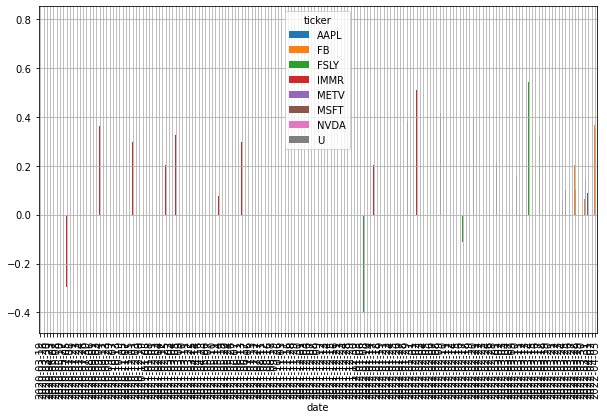

In [34]:
plt.rcParams['figure.figsize'] = [10, 6]

mean_scores = news_df.groupby(['ticker','date']).mean()

mean_scores = mean_scores.unstack()

mean_scores = mean_scores.xs('compound', axis="columns").transpose()

mean_scores.plot(kind = 'bar')

plt.grid()

plt.show()

In [35]:
FSLY_sentiment=news_df[news_df["ticker"]=="FSLY"]


In [36]:
FSLY_sentiment.groupby('date')['compound'].agg("mean")

date
2021-11-29    0.000000
2021-12-01    0.000000
2021-12-03    0.000000
2021-12-06    0.000000
2021-12-07    0.000000
2021-12-08    0.000000
2021-12-09   -0.153100
2021-12-12    0.000000
2021-12-13    0.000000
2021-12-14    0.421500
2021-12-15    0.000000
2021-12-16    0.000000
2021-12-21    0.381800
2021-12-23    0.000000
2021-12-24    0.000000
2021-12-28   -0.177900
2021-12-29    0.077200
2021-12-30    0.000000
2022-01-03    0.000000
2022-01-06    0.000000
2022-01-08   -0.401900
2022-01-10    0.000000
2022-01-14   -0.050200
2022-01-17    0.624900
2022-01-18    0.000000
2022-01-19    0.000000
2022-01-21    0.790600
2022-01-23    0.000000
2022-01-24   -0.153100
2022-01-25   -0.153100
2022-01-26    0.000000
2022-01-27    0.000000
2022-01-28    0.000000
2022-01-31    0.624900
2022-02-01    0.257700
2022-02-02    0.180600
2022-02-03    0.000000
2022-02-07    0.340000
2022-02-08    0.070600
2022-02-09    0.000000
2022-02-11    0.017725
2022-02-14    0.000000
2022-02-15    0.509350
2022-0

In [37]:
AAPL_sentiment=news_df[news_df["ticker"]=="AAPL"]
AAPL_sentiment.groupby('date')['compound'].mean().to_frame()


,compound
date,
2022-03-30,0.137438
2022-03-31,0.140529
2022-04-01,0.090300
2022-04-02,0.013000
2022-04-03,0.126950


In [38]:
return_series_adj

Symbols,FSLY,IMMR,FB,U,NVDA,AAPL,MSFT,METV
Date,,,,,,,,
2021-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-01,-0.026510,-0.031927,0.019211,-0.036329,0.010474,0.002263,0.002584,-0.015212
2021-07-02,-0.052517,-0.035348,0.020103,-0.034053,0.024222,0.021904,0.024917,-0.007937
2021-07-06,-0.045973,-0.062714,0.014581,-0.028954,0.034796,0.036945,0.024954,-0.007275
2021-07-07,-0.087752,-0.061574,0.007995,-0.048621,0.018460,0.055564,0.033333,-0.015212
...,...,...,...,...,...,...,...,...
2021-12-27,-0.366611,-0.310148,-0.004400,0.347628,0.547519,0.320559,0.268857,0.031746
2021-12-28,-0.391611,-0.330673,-0.004285,0.306747,0.516364,0.312943,0.264411,0.016534
2021-12-29,-0.411242,-0.338655,-0.013718,0.316125,0.500311,0.313602,0.267004,0.008598


<AxesSubplot:xlabel='date'>

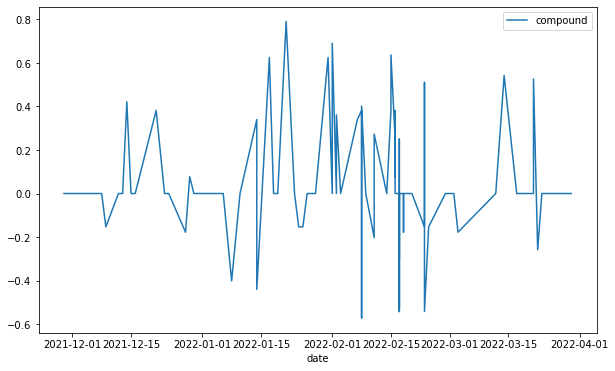

In [39]:
FSLY_sentiment.plot(x="date",y="compound")

<AxesSubplot:xlabel='date'>

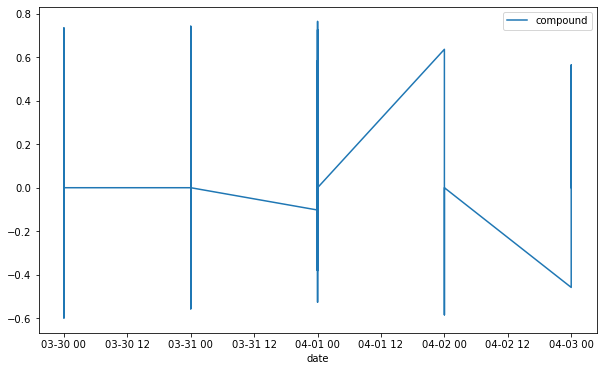

In [40]:
AAPL_sentiment.plot(x="date",y="compound")

# Calculation MACD 

In [41]:
import copy

In [42]:
TechIndicator = copy.deepcopy(data)

In [43]:
MACD=TechIndicator["Close"]
MACD

Symbols,FSLY,IMMR,FB,U,NVDA,AAPL,MSFT,METV
Date,,,,,,,,
2021-06-30,59.599998,8.77,347.709991,109.830002,200.024994,136.960007,270.899994,15.12
2021-07-01,58.020000,8.49,354.390015,105.839996,202.119995,137.270004,271.600006,14.89
2021-07-02,56.470001,8.46,354.700012,106.089996,204.869995,139.960007,277.649994,15.00
2021-07-06,56.860001,8.22,352.779999,106.650002,206.985001,142.020004,277.660004,15.01
2021-07-07,54.369999,8.23,350.489990,104.489998,203.717499,144.570007,279.929993,14.89
...,...,...,...,...,...,...,...,...
2021-12-27,37.750000,6.05,346.179993,148.009995,309.450012,180.330002,342.450012,15.60
2021-12-28,36.259998,5.87,346.220001,143.520004,303.220001,179.289993,341.250000,15.37
2021-12-29,35.090000,5.80,342.940002,144.550003,300.010010,179.380005,341.950012,15.25


In [44]:
def calculate_MACD(stock):
    df=MACD[stock].to_frame()
    df["long_term_EMA"]=df[stock].ewm(span=26,adjust=False).mean() #long term EMA 
    df["short_term_EMA"]=df[stock].ewm(span=12,adjust=False).mean() #short term EMA 
    df["MACD"]=df["short_term_EMA"]-df["long_term_EMA"]           #MACD line
    df["Signal_line"]=df["MACD"].ewm(span=9,adjust=False).mean() # Signal line 
        
    return(df)

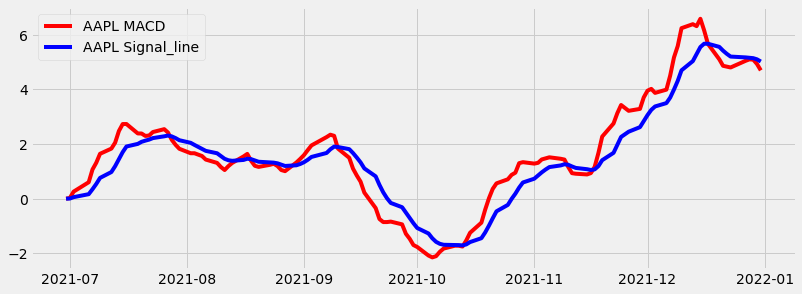

In [45]:
stock="AAPL"
df=calculate_MACD(stock)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12.2,4.5))
plt.plot(df.index,df["MACD"],label=stock+" MACD",color="red")
plt.plot(df.index,df["Signal_line"],label=stock+" Signal_line",color="blue")
plt.legend(loc="upper left")
plt.show()

In [46]:
df["AAPL"]

Date
2021-06-30    136.960007
2021-07-01    137.270004
2021-07-02    139.960007
2021-07-06    142.020004
2021-07-07    144.570007
                 ...    
2021-12-27    180.330002
2021-12-28    179.289993
2021-12-29    179.380005
2021-12-30    178.199997
2021-12-31    177.570007
Name: AAPL, Length: 129, dtype: float64

In [47]:
def buy_sell(signal):
    Buy=[]
    Sell=[]
    flag= -1 
    
    
    for i in range(0,len(signal)):
        if signal["MACD"][i] > signal["Signal_line"][i]:
            Sell.append(np.nan)
            if flag != 1 :
                Buy.append(signal[stock][i])
                flag=1 
            else:
                Buy.append(np.nan)
        
        elif signal["MACD"][i] < signal["Signal_line"][i]:
            Buy.append(np.nan)
            if flag != 0 :
                Sell.append(signal[stock][i])
                flag= 0
            else:
                Sell.append(np.nan)
        else:
            Buy.append(np.nan)
            Sell.append(np.nan)
    return (Buy,Sell)

In [48]:
a=buy_sell(df)
df['Buy_Signal_Price']=a[0]
df["Sell_Signal_Price"]=a[1]
df

,AAPL,long_term_EMA,short_term_EMA,MACD,Signal_line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,
2021-06-30,136.960007,136.960007,136.960007,0.000000,0.000000,NaN,NaN
2021-07-01,137.270004,136.982969,137.007699,0.024729,0.004946,137.270004,NaN
2021-07-02,139.960007,137.203491,137.461900,0.258409,0.055638,NaN,NaN
2021-07-06,142.020004,137.560270,138.163147,0.602877,0.165086,NaN,NaN
2021-07-07,144.570007,138.079509,139.148818,1.069308,0.345931,NaN,NaN
...,...,...,...,...,...,...,...
2021-12-27,180.330002,168.900592,173.951370,5.050778,5.173864,NaN,NaN
2021-12-28,179.289993,169.670178,174.772697,5.102519,5.159595,NaN,NaN
2021-12-29,179.380005,170.389424,175.481514,5.092090,5.146094,NaN,NaN


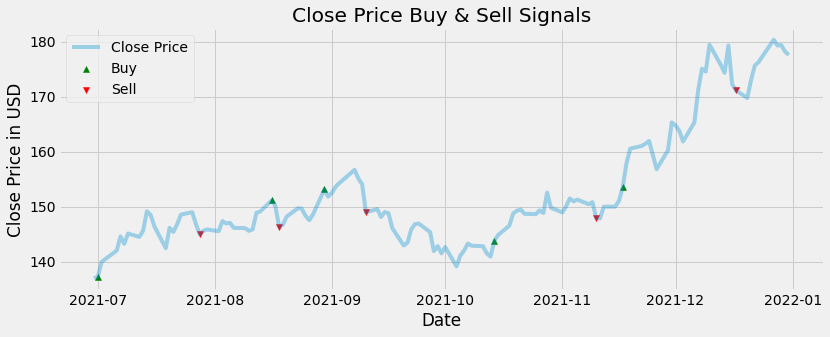

In [49]:
plt.figure(figsize=(12.2,4.5))
plt.scatter(df.index,df["Buy_Signal_Price"],color="green",label="Buy",marker="^",alpha=1)
plt.scatter(df.index,df["Sell_Signal_Price"],color="red",label="Sell",marker="v",alpha=1)
plt.plot(df[stock],label="Close Price",alpha=0.35)
plt.title("Close Price Buy & Sell Signals")
plt.xlabel("Date")
plt.ylabel("Close Price in USD")
plt.legend(loc="upper left")
plt.show()

<h1>Monte Carlo<h1>
    

In [50]:
# Get daily return 
close_data.head()

Symbols,FSLY,IMMR,FB,U,NVDA,AAPL,MSFT,METV
Date,,,,,,,,
2021-06-30,59.599998,8.77,347.709991,109.830002,200.024994,136.960007,270.899994,15.12
2021-07-01,58.020000,8.49,354.390015,105.839996,202.119995,137.270004,271.600006,14.89
2021-07-02,56.470001,8.46,354.700012,106.089996,204.869995,139.960007,277.649994,15.00
2021-07-06,56.860001,8.22,352.779999,106.650002,206.985001,142.020004,277.660004,15.01
2021-07-07,54.369999,8.23,350.489990,104.489998,203.717499,144.570007,279.929993,14.89


In [51]:
# Find Log return
log_ret = np.log(close_data/close_data.shift(1))
log_ret.head()

Symbols,FSLY,IMMR,FB,U,NVDA,AAPL,MSFT,METV
Date,,,,,,,,
2021-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-01,-0.026868,-0.032448,0.019029,-0.037005,0.010419,0.002261,0.002581,-0.015328
2021-07-02,-0.027078,-0.003540,0.000874,0.002359,0.013514,0.019407,0.022031,0.007360
2021-07-06,0.006883,-0.028779,-0.005428,0.005265,0.010271,0.014611,0.000036,0.000666
2021-07-07,-0.044780,0.001216,-0.006512,-0.020461,-0.015912,0.017796,0.008142,-0.008027


In [52]:
#calculate the log return mean of each stock
log_ret.mean() * 252

Symbols
FSLY   -1.022829
IMMR   -0.844826
FB     -0.065395
U       0.519437
NVDA    0.758976
AAPL    0.511237
MSFT    0.425867
METV    0.007797
dtype: float64

In [53]:
# Compute pairwise covariance of columns
log_ret.cov()*252

Symbols,FSLY,IMMR,FB,U,NVDA,AAPL,MSFT,METV
Symbols,,,,,,,,
FSLY,0.363880,0.113984,0.055545,0.174212,0.080145,0.020375,0.019675,0.082169
IMMR,0.113984,0.449022,0.026607,0.076610,0.018752,0.023740,0.015509,0.052776
FB,0.055545,0.026607,0.081570,0.056206,0.045517,0.023931,0.025187,0.037423
U,0.174212,0.076610,0.056206,0.310924,0.117850,0.029973,0.033563,0.086359
NVDA,0.080145,0.018752,0.045517,0.117850,0.212329,0.043695,0.050072,0.073073
AAPL,0.020375,0.023740,0.023931,0.029973,0.043695,0.049926,0.027959,0.025658
MSFT,0.019675,0.015509,0.025187,0.033563,0.050072,0.027959,0.039288,0.026114
METV,0.082169,0.052776,0.037423,0.086359,0.073073,0.025658,0.026114,0.050937


In [54]:
# Let's start with a random allocation 

In [55]:
# np.random.seed(101)

# Create close proce for stock
print('Stock Price')
print(close_data.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(8))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Stock Price
Index(['FSLY', 'IMMR', 'FB', 'U', 'NVDA', 'AAPL', 'MSFT', 'METV'], dtype='object', name='Symbols')


Creating Random Weights
[0.16739482 0.53368071 0.78998295 0.44885739 0.8588864  0.02517029
 0.56011107 0.00105432]


Rebalance to sum to 1.0
[0.04944993 0.15765405 0.23336802 0.13259648 0.25372272 0.00743553
 0.16546181 0.00031146]


Expected Portfolio Return
0.13668325466662593


Expected Volatility
0.277046077042379


Sharpe Ratio
0.4933592856675529


In [56]:
# Let's start our monte carlo generation

In [57]:
num_ports = 20000

all_weights = np.zeros((num_ports,len(close_data.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(8))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [58]:
# Get the maximum value of sharpe ratio obtained from all the runs
sharpe_arr.max()

2.1092357886828843

In [59]:
# Find the index location of the max sharpe value generated
sharpe_arr.argmax()

18596

In [60]:
#Find max return 
round(ret_arr[sharpe_arr.argmax()],4)

0.5655

In [61]:
# Get the repesctive proportion of weights for the stocks for max profit
all_weights[sharpe_arr.argmax()]

array([0.00154863, 0.0026273 , 0.00982358, 0.09901654, 0.36163348,
       0.3215027 , 0.18690179, 0.01694598])

In [62]:
weights = list(all_weights[sharpe_arr.argmax()])
cols = list(close_data.columns)
len(weights)

8

In [63]:
dict1 = {cols[i]: weights[i] for i in range(len(cols))}
dict1

{'FSLY': 0.0015486333993517726,
 'IMMR': 0.002627304841077963,
 'FB': 0.009823576600052626,
 'U': 0.09901654331618007,
 'NVDA': 0.3616334782511338,
 'AAPL': 0.32150269627658284,
 'MSFT': 0.18690178548633235,
 'METV': 0.016945981829288654}

In [65]:
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]


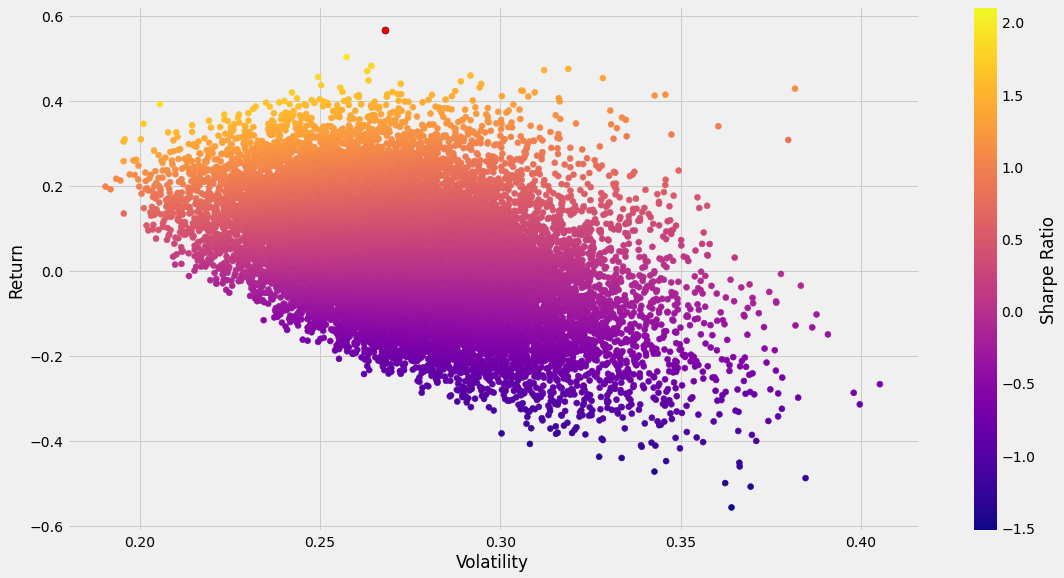

In [66]:
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]
plt.figure(figsize=(17,9))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

In [67]:
def get_ret_vol_sr(weights):
    """
    Takes in weights and returns back an array of mean return, mean volatility and sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [68]:
from scipy.optimize import minimize
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [69]:
# Constraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

In [70]:
bounds = ((0, 1), (0, 1), (0, 1), (0, 1),(0, 1), (0, 1), (0, 1), (0, 1))

In [71]:
# Initial Guess (equal distribution)
init_guess = [0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125]
# Sequential Least Squares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
opt_results

     fun: -2.497893526282724
     jac: array([ 6.78060997e+00,  5.52290103e+00,  1.98334163e+00,  3.61204147e-04,
        8.85426998e-05,  9.74535942e-05, -1.67369843e-04,  1.85843953e+00])
 message: 'Optimization terminated successfully'
    nfev: 83
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([1.16929188e-15, 1.71453911e-15, 0.00000000e+00, 1.08338100e-02,
       8.23113439e-02, 5.30931900e-01, 3.75922946e-01, 0.00000000e+00])

In [72]:
get_ret_vol_sr(opt_results.x)

array([0.49962503, 0.20001855, 2.49789353])

In [73]:
# # Our returns go from 0 to somewhere along 0.2
# # Create a linspace number of points to calculate x on
# frontier_y = np.linspace(0,0.25,30000) 
# def minimize_volatility(weights):
#     return  get_ret_vol_sr(weights)[1]
# frontier_volatility = []
# for possible_return in frontier_y:
#     # function for return
#     cons = ({'type':'eq','fun': check_sum},
#             {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
#     result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
#     frontier_volatility.append(result['fun'])
# plt.figure(figsize=(17,9))
# plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
# plt.colorbar(label='Sharpe Ratio')
# plt.xlabel('Volatility')
# plt.ylabel('Return')
# # Add frontier line
# plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)

# ARIMA Model

In [74]:
#!pip install pmdarima

In [75]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

<AxesSubplot:ylabel='Density'>

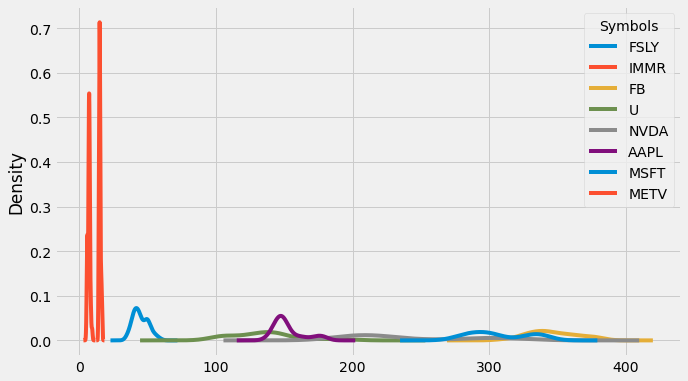

In [76]:
#Distribution of the dataset
close_data.plot(kind='kde')

In [184]:
arima_ticker = "METV"

arima_close=close_data[arima_ticker].to_frame()
arima_close

,METV
Date,
2021-06-30,15.12
2021-07-01,14.89
2021-07-02,15.00
2021-07-06,15.01
2021-07-07,14.89
...,...
2021-12-27,15.60
2021-12-28,15.37
2021-12-29,15.25


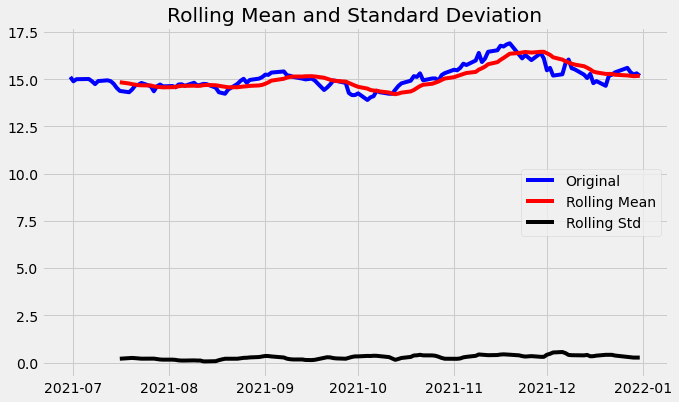

Results of dickey fuller test
Test Statistics                 -1.930581
p-value                          0.317814
No. of lags used                 0.000000
Number of observations used    128.000000
critical value (1%)             -3.482501
critical value (5%)             -2.884398
critical value (10%)            -2.578960
dtype: float64


In [185]:
#Test for stationarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(arima_close)

We can’t rule out the Null hypothesis because the p-value is bigger than 0.05. Additionally, the test statistics exceed the critical values. As a result, the data is nonlinear.

<Figure size 720x432 with 0 Axes>

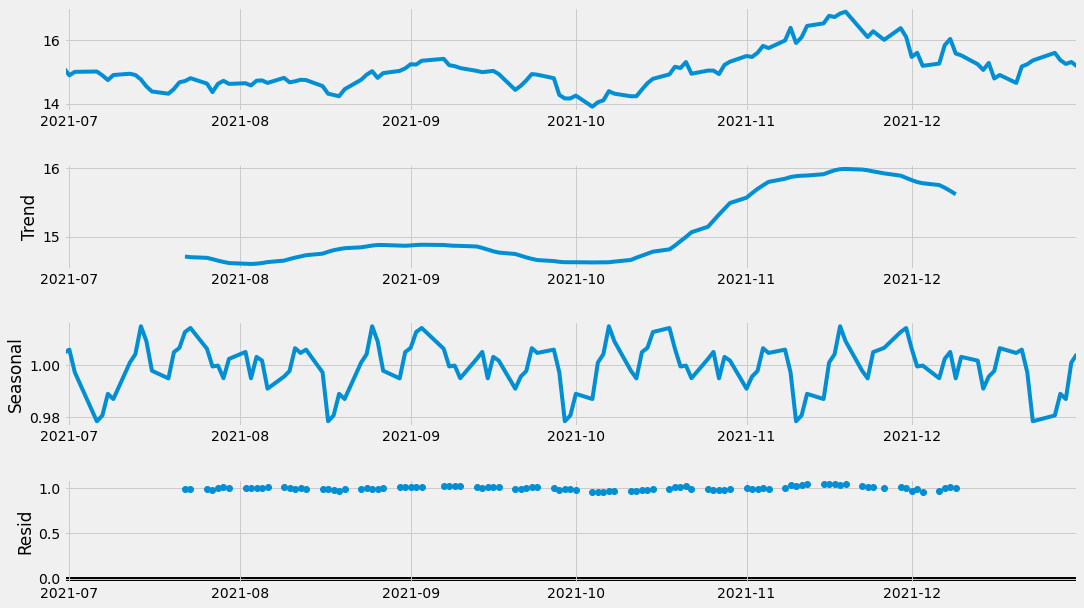

In [186]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(arima_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


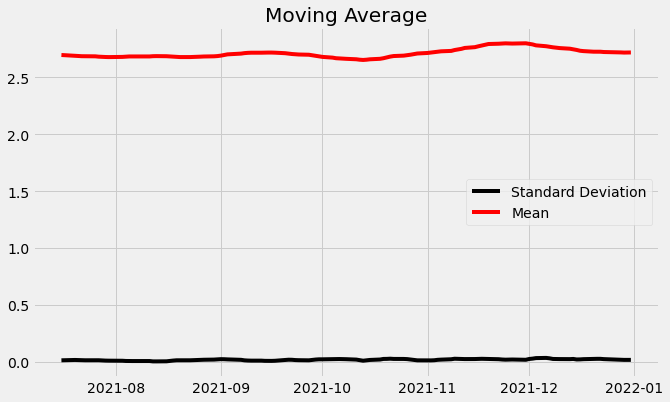

In [187]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(arima_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

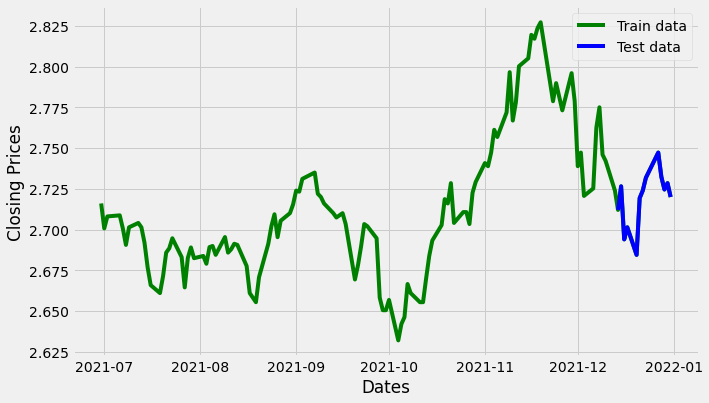

In [188]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-635.567, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-633.691, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-633.714, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-637.556, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-632.421, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.186 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  113
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 319.778
Date:                Mon, 04 Apr 2022   AIC                           -637.556
Time:                        10:40:38   BIC                           -634.838
Sample:                             0   HQIC                          -636.453
                                - 113                                       

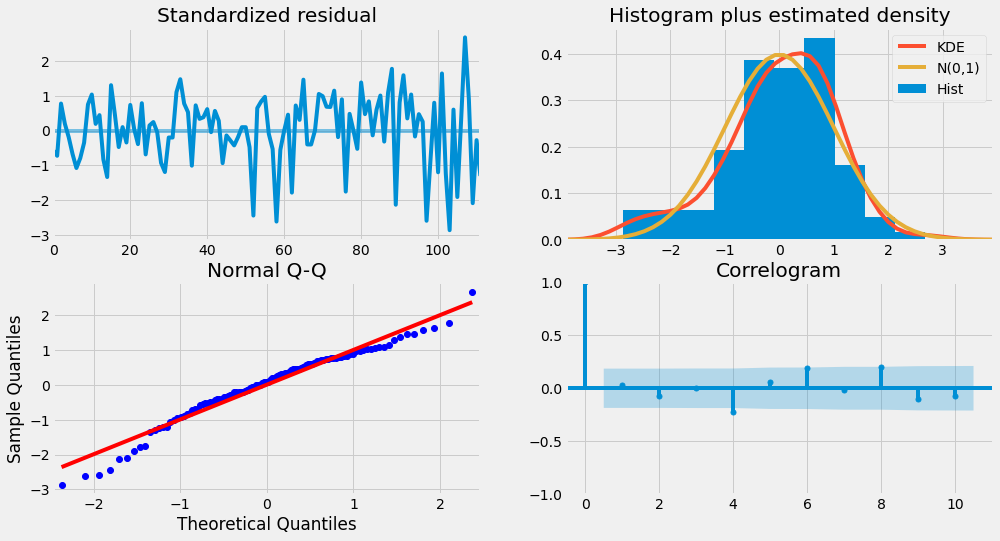

In [189]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [190]:
#Modeling
# Build Model
model = ARIMA(train_data, order=(1,1,2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.METV   No. Observations:                  112
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 320.673
Method:                       css-mle   S.D. of innovations              0.014
Date:                Mon, 04 Apr 2022   AIC                           -631.345
Time:                        10:40:38   BIC                           -617.753
Sample:                             1   HQIC                          -625.830
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0001      0.001      0.115      0.908      -0.002       0.003
ar.L1.D.METV    -0.4029      0.384     -1.048      0.295      -1.156       0.350
ma.L1.D.METV     0.4510      0.392      1.15

C:\Users\summe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\summe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [191]:
# Forecast
fc, se, conf = fitted.forecast(13, alpha=0.05)  # 95% conf

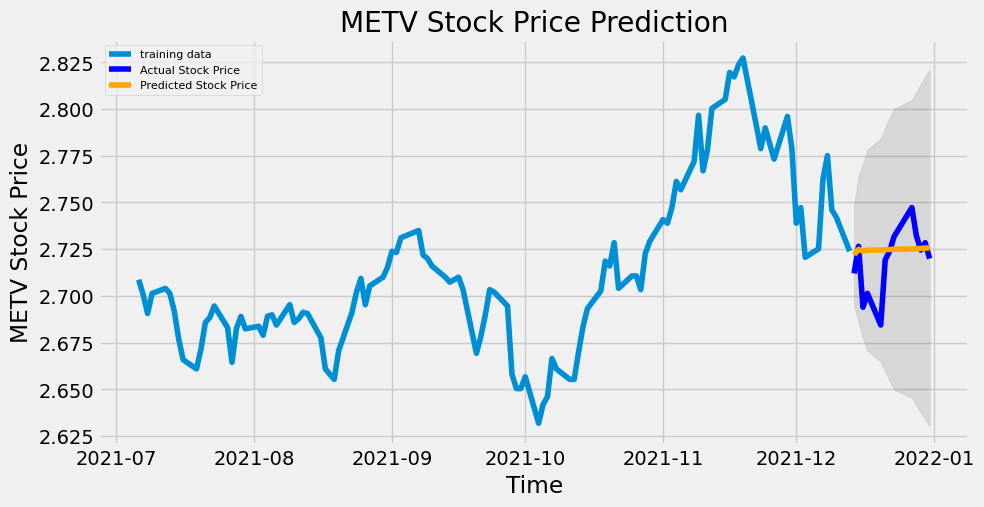

In [192]:
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plot_title = arima_ticker + " Stock Price Prediction"
plot_ylabel = arima_ticker + " Stock Price"
plt.title(plot_title)
plt.xlabel('Time')
plt.ylabel(plot_ylabel)
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [193]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))

predictions = test_data.squeeze()
mape = np.mean(np.abs(fc - predictions)/np.abs(predictions))
print('MAPE: '+str(mape))

MSE: 0.00029268630829118794
MAE: 0.012060316572128369
RMSE: 0.017108077282125773
MAPE: 0.004454156864960595


In [194]:
test_data

,METV
Date,
2021-12-14,2.712042
2021-12-15,2.726545
2021-12-16,2.693951
2021-12-17,2.701361
2021-12-20,2.684440
2021-12-21,2.719320
2021-12-22,2.723924
2021-12-23,2.731767
2021-12-27,2.747271


In [121]:
predictions = test_data.squeeze()

In [122]:
mape = np.mean(np.abs(fc - predictions)/np.abs(predictions))
print('MAPE: '+str(mape))

MAPE: 0.010638071012808222
